In [1]:
# !pip install graphviz

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("play_tennis.csv")

In [4]:
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [5]:
data['play'].value_counts()

play
Yes    9
No     5
Name: count, dtype: int64

In [6]:
label_encoder = LabelEncoder()

In [7]:
data.select_dtypes(include=['object']).columns.tolist()

['day', 'outlook', 'temp', 'humidity', 'wind', 'play']

In [8]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [9]:
# categorical_cols = ['outlook', 'temp', 'humidity','wind','play']

# Label encode categorical columns

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [10]:
data

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [11]:
X = data.drop(['play','day'], axis=1) #X = data[['wind','humidity'.....]]
y = data['play']

In [12]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [13]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y,random_state=20)

In [23]:
X_train

,outlook,temp,humidity,wind
9,1,2,1,1
0,2,1,0,1
4,1,0,1,1
11,0,2,0,0
13,1,2,0,0
2,0,1,0,1
12,0,1,1,1
3,1,2,0,1
1,2,1,0,0
5,1,0,1,0


In [16]:
X_train_rs_2 = X_train

In [17]:
X_train_rs_2

,outlook,temp,humidity,wind
13,1,2,0,0
5,1,0,1,0
9,1,2,1,1
12,0,1,1,1
1,2,1,0,0
2,0,1,0,1
7,2,2,0,1
4,1,0,1,1
11,0,2,0,0
8,2,0,1,1


In [50]:
model = DecisionTreeClassifier()

In [51]:
# model = DecisionTreeClassifier(criterion='entropy')

In [52]:
# help(model)

In [53]:
model.fit(X, y)

DecisionTreeClassifier()

In [54]:
model.feature_importances_

array([0.47111111, 0.        , 0.28      , 0.24888889])

In [55]:
feature_names = X.columns.tolist()

In [56]:
feature_names

['outlook', 'temp', 'humidity', 'wind']

In [57]:
class_names = data['play'].unique().tolist()

In [58]:
class_names

[0, 1]

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.88888888

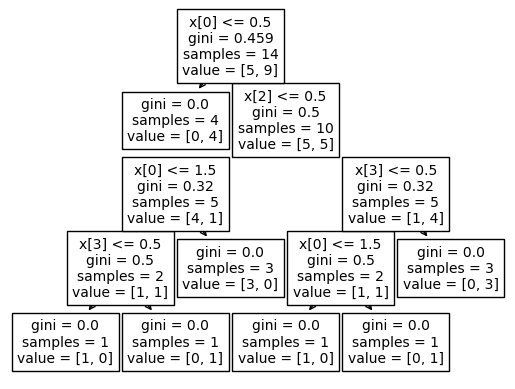

In [59]:
tree.plot_tree(model)

In [27]:
dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=feature_names,  # Add this line
                                filled=True,  # Color nodes by class
                                rounded=True,  # Round node corners
                                special_characters=True)  

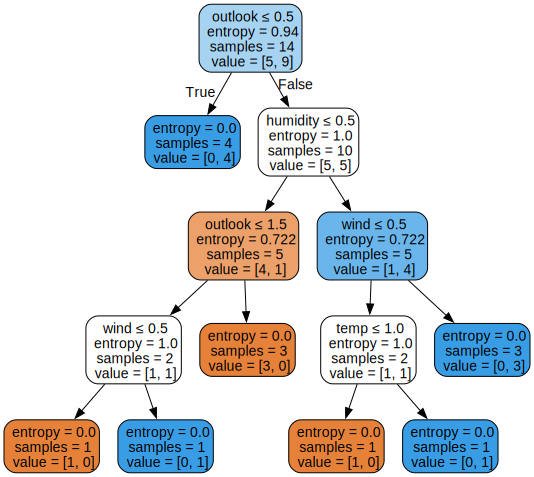

In [29]:
graph = graphviz.Source(dot_data) 
graph

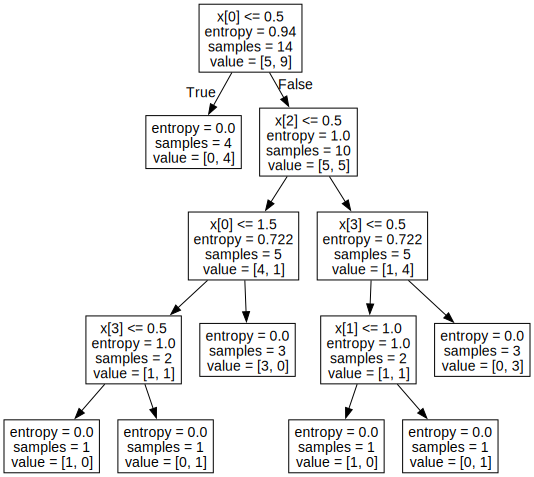

In [26]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph